# Import 

In [1]:
from utils.plot_regret import plot_regret 
from utils.Experiment import experiment
from environments.BernoulliBanditEnv import BernoulliBanditEnv
from Agents.RB_agent import RegretBalancingAgent
import matplotlib.pyplot as plt
import numpy as np
from Agents.EpsilonGreedy import EpsilonGreedy

ModuleNotFoundError: No module named 'utils'

# $\varepsilon$-greedy

In [16]:
np.random.seed(1)

## Fixed $\varepsilon$

In [17]:
#Arms definition and Bernoulli environment
n_arms = 2
means = [0.2, 0.75]
env = BernoulliBanditEnv(means = means)

In [18]:
#Initialization of eps-algo, with fixed epsilon
eps0 = EpsilonGreedy(K=len(means), eps = 0.1, FixedEpsilon = True, m = 1) 
eps04 = EpsilonGreedy(K=len(means), eps = 0.4, FixedEpsilon = True, m = 1) 
eps07 = EpsilonGreedy(K=len(means), eps = 0.7, FixedEpsilon = True, m = 1) 
epsOpti = EpsilonGreedy(K=len(means), Delta = 0.55, m = 1)

In [19]:
epsAlgo = [eps0, eps04, eps07, epsOpti]

In [20]:
#Run experiments
Nmc = 100  # Number of Monte Carlo simulations
T = 2000  # Number of rounds
all_data = experiment(env, epsAlgo, Nmc, T)

In [21]:
# Update rcParams
plt.rcParams.update({
    'axes.titlesize': 16,           # Title size for the axes
    'axes.labelsize': 16,           # Label size for the axes
    'xtick.labelsize': 14,          # Label size for x-axis ticks
    'ytick.labelsize': 14,          # Label size for y-axis ticks
    'legend.fontsize': 14,          # Font size for legend
    'text.usetex': True,            # Use LaTeX for text rendering
    'font.family': 'serif',         # Use serif font (LaTeX default)
})

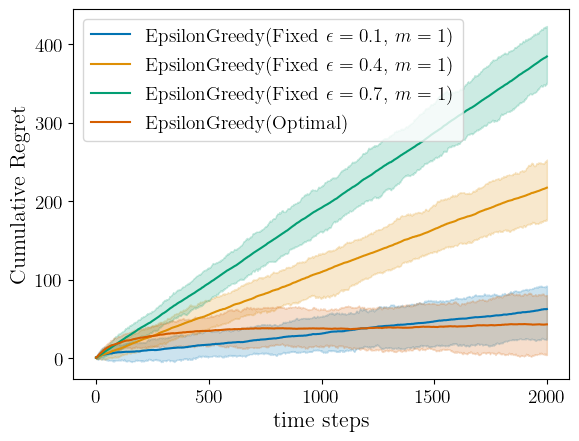

In [22]:
#Plot results
plot_regret(regrets = all_data, logscale = False, lb = None, q = 10, save_pdf = 'constantEps.pdf')

In [ ]:
n_arms = 2
means = [0.2, 0.75]
env = BernoulliBanditEnv(means = means)
n_rounds = 1000
delta = 0.1
eps0 = EpsilonGreedy(K=len(means), eps = 0.1, FixedEpsilon = True, m = 1) 
eps04 = EpsilonGreedy(K=len(means), eps = 0.4, FixedEpsilon = True, m = 1) 
eps07 = EpsilonGreedy(K=len(means), eps = 0.7, FixedEpsilon = True, m = 1) 
epsOpti = EpsilonGreedy(K=len(means), Delta = 0.55, m = 1)
epsAlgo = [eps0, eps04, eps07, epsOpti]
rb_agent = RegretBalancingAgent(learners = epsAlgo, 
                                K = n_arms, 
                                delta = delta, 
                                u_bounds = [lambda x : np.sqrt(x * n_arms) for _ in range(len(epsAlgo))],
                                c = 0.1, 
                                env = env)
eps_rb = [eps0, eps04, eps07, epsOpti, rb_agent]
Nmc = 100  
T = 2000  
all_data = experiment(env, eps_rb, Nmc, T)
plot_regret(regrets = all_data, logscale = False, lb = None, q = 10, save_pdf = 'Regret_Balancing_EpsGreedy.pdf')

## Time varying $\varepsilon_t$

In [23]:
#Arms definition and Bernoulli environment
n_arms = 2
means = [0.2, 0.75]
env = BernoulliBanditEnv(means = means)

In [24]:
#Initialization of eps-algo, with fixed epsilon
eps1 = EpsilonGreedy(K=len(means), FixedEpsilon = False, decay_param=50, m = 1) 
eps2 = EpsilonGreedy(K=len(means), FixedEpsilon = False, decay_param=150, m = 1) 
eps3 = EpsilonGreedy(K=len(means), FixedEpsilon = False, decay_param=500, m = 1) 
epsOpti = EpsilonGreedy(K=len(means), Delta = 0.55, m = 1)

In [25]:
epsAlgo = [eps1, eps2, eps3, epsOpti]

In [26]:
#Run experiments
Nmc = 100  # Number of Monte Carlo simulations
T = 2000  # Number of rounds
all_data = experiment(env, epsAlgo, Nmc, T)

In [27]:
# Update rcParams
plt.rcParams.update({
    'axes.titlesize': 16,           # Title size for the axes
    'axes.labelsize': 16,           # Label size for the axes
    'xtick.labelsize': 14,          # Label size for x-axis ticks
    'ytick.labelsize': 14,          # Label size for y-axis ticks
    'legend.fontsize': 14,          # Font size for legend
    'text.usetex': True,            # Use LaTeX for text rendering
    'font.family': 'serif',         # Use serif font (LaTeX default)
})

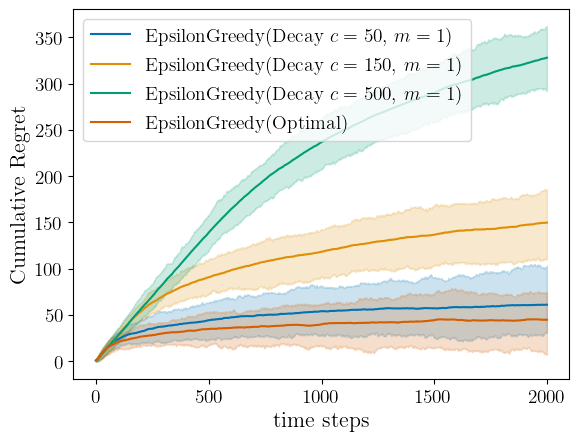

In [28]:
#Plot results
plot_regret(regrets = all_data, logscale = False, lb = None, q = 10, save_pdf='decayEps.pdf')

In [ ]:
n_arms = 2
means = [0.2, 0.75]
env = BernoulliBanditEnv(means = means)
n_rounds = 1000
delta = 0.1
eps0_vary = EpsilonGreedy(K=len(means), FixedEpsilon = False, m = 1) 
epsOpti = EpsilonGreedy(K=len(means), Delta = 0.55, m = 1)
epsAlgo = [eps0_vary, epsOpti]
rb_agent = RegretBalancingAgent(learners = epsAlgo, 
                                K = n_arms, 
                                delta = delta, 
                                u_bounds = [lambda x : np.sqrt(x * n_arms) for _ in range(len(epsAlgo))],
                                c = 0.1, 
                                env = env)
eps_rb = [eps0_vary, epsOpti, rb_agent]
Nmc = 100  
T = 2000  
all_data = experiment(env, eps_rb, Nmc, T)
plot_regret(regrets = all_data, logscale = False, lb = None, q = 10, save_pdf = 'Regret_Balancing_EpsGreedy_not_fix.pdf')